<h1><center>Variação da Tensão de Saída com Potenciômetro
</center></h1>

Analise de circuitos com Potenciômetro e o Python

<ul>
    <li> <b>Teoria de Circuitos Eletrônicos 1 - UnB</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li> </a>
    <li> <b>16/09/2020</b> </li>
</ul>

### 1) A questão:

<img src="Aula 1 - Circuito.jpg" width="1200" height="400">

### 2) A solução:
<img src="Aula 1  - Solução.jpg" width="1200" height="400">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

### 3) Valores dos componentes

In [2]:
Rp=20000
alpha=0.5
R1=1000
R2=1000
R3=5000
R4=alpha*Rp
R5=(1-alpha)*Rp
V1=15
V2=-15

In [3]:
R1,R2,R3,R4,R5,Rp,alpha,V1,V2

(1000, 1000, 5000, 10000.0, 10000.0, 20000, 0.5, 15, -15)

### 4) Matriz de Transição, Entradas e Saídas

In [4]:
A=np.array([[R1+R3+R4,R3],[R3,R2+R3+R5]])
print("Matrix de Transição")
print(A)
print("Entradas")
V=np.array([[V1],[V2]])
print(V)
print("Correntes de Malha")
I=inv(A).dot(V)
print(I)
print("Saida")
Vo=R3*(I[0]+I[1])
print(Vo)

Matrix de Transição
[[16000.  5000.]
 [ 5000. 16000.]]
Entradas
[[ 15]
 [-15]]
Correntes de Malha
[[ 0.00136364]
 [-0.00136364]]
Saida
[0.]


### 5) Variando o alpha

In [5]:
N=10
alpha=np.array(range(1,N,))/N
print(alpha)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [6]:
Vo=[]
for alp in alpha:
    R4=alp*Rp
    R5=(1-alp)*Rp
    A=np.array([[R1+R3+R4,R3],[R3,R2+R3+R5]])
    V=np.array([[V1],[V2]])
    I=inv(A).dot(V)
    Vo.append(R3*(I[0]+I[1])[0])

In [7]:
Vo

[7.185628742514971,
 4.615384615384616,
 2.7906976744186043,
 1.3215859030837005,
 0.0,
 -1.3215859030837005,
 -2.7906976744186034,
 -4.615384615384616,
 -7.185628742514968]

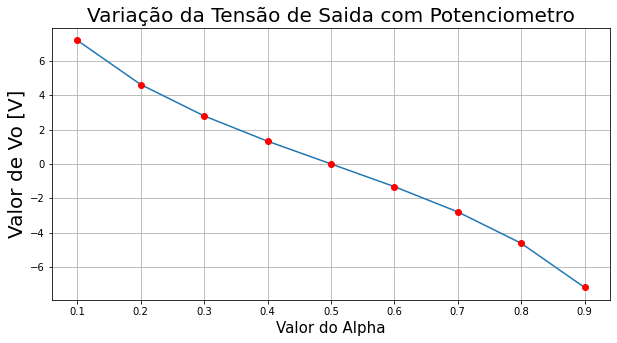

In [8]:
plt.figure(figsize=(10,5))
plt.plot(alpha,Vo)
plt.plot(alpha,Vo,"ro")
plt.ylabel("Valor de Vo [V]",fontsize=20)
plt.xlabel("Valor do Alpha",fontsize=15)
plt.title("Variação da Tensão de Saida com Potenciometro",fontsize=20)
plt.grid()